<a href="https://colab.research.google.com/github/Slim205/Visual-Recognition/blob/main/Detecting_dish's_constituents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#! pip install git+https://github.com/rcmalli/keras-vggface.git
#!pip install keras_applications --no-deps
#filename = "/usr/local/lib/python3.7/dist-packages/keras_vggface/models.py"
#text = open(filename).read()
#open(filename, "w+").write(text.replace('keras.engine.topology', 'tensorflow.keras.utils'))

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
import cv2
from google.colab.patches import cv2_imshow
from numpy.linalg import norm
model = keras.applications.ResNet152(weights='imagenet', include_top=False)
print('verifier bien que les noms des images sont de la forme image.jpg')
vecteurs_predict = []
#liste_noms = ['Riz3','Pain1','Yaourt1','Poulet2']
liste_noms = ['Riz2','pomme','salade_carotte','Poulet2','poire1','Yaourt1','Pain1']

liste_noms_carre = []

def cutting(source_img, n_x, n_y):
    img = cv2.imread(source_img)
    s_x = img.shape[0]
    s_y = img.shape[1]
    pix_x = int(s_x/n_x)
    pix_y = int(s_y/n_y)
    l = []

    for i in range(n_x):
        for j in range(n_y):
            x = i*pix_x
            y = j*pix_y
            path = 'test' + str(i) + str(j) + '.jpg'
            img_new = img[x:x+pix_x, y:y+pix_y]
            print(img_new.shape)
            #img_new = img_new1[50:190,50:190]
            #img = cv2.re
            cv2.imwrite(path,img_new)
            #cv2_imshow(img_new)
            l.append(path)
    return l
def resize(path, dim = (224,224)) :
  img = cv2.imread(path)
  img_resized = cv2.resize(img,dim)
  path_carre = 'carre_' + path
  cv2.imwrite(path_carre,img_resized)
  return path_carre

print(liste_noms)

for nom in liste_noms :
    print(len(vecteurs_predict))
    path = nom + '.jpg'
    path_carre = resize(path)
    img = cv2.imread(path_carre)
    img = np.expand_dims(img, axis=0)
    preds = model.predict(img)

    vecteurs_predict.append((nom,preds))

def test(adresse_image) :
  path_carre = resize(adresse_image)
  x = cv2.imread(path_carre)
  x = np.expand_dims(x, axis=0)
  preds_new = model.predict(x)
  liste_nom_distance=[]
  for element in vecteurs_predict:
      vecteur_ecart = list(preds_new - element[1])
      distance = norm(vecteur_ecart)
      liste_nom_distance.append((element[0],distance))

  liste_distance = [i[1] for i in liste_nom_distance]
  print(liste_nom_distance)
  for element in liste_nom_distance :
    if element[1] == min(liste_distance) :

      return(element[0])

def traitement_image(images_path) :
     path= resize(images_path,(448,448))
     list_img = cutting(path, 2, 2)
     for path in list_img :
       print(test(path))



verifier bien que les noms des images sont de la forme image.jpg
['Riz2', 'pomme', 'salade_carotte', 'Poulet2', 'poire1', 'Yaourt1', 'Pain1']
0
1/1 [==============================] - 5s 5s/step
1
1/1 [==============================] - 1s 605ms/step
2
1/1 [==============================] - 1s 603ms/step
3
1/1 [==============================] - 1s 609ms/step
4
1/1 [==============================] - 1s 622ms/step
5
1/1 [==============================] - 1s 602ms/step
6
1/1 [==============================] - 1s 620ms/step


In [ ]:
traitement_image('output.jpg')

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
1/1 [==============================] - 1s 1s/step
[('Riz2', 707.08636), ('pomme', 693.85046), ('salade_carotte', 697.93176), ('Poulet2', 658.88794), ('poire1', 790.7038), ('Yaourt1', 724.60345), ('Pain1', 732.5148)]
Poulet2
1/1 [==============================] - 1s 670ms/step
[('Riz2', 643.68317), ('pomme', 683.8485), ('salade_carotte', 671.38885), ('Poulet2', 747.05505), ('poire1', 776.70734), ('Yaourt1', 722.2039), ('Pain1', 746.08075)]
Riz2
1/1 [==============================] - 1s 611ms/step
[('Riz2', 709.539), ('pomme', 723.5974), ('salade_carotte', 750.0884), ('Poulet2', 797.3343), ('poire1', 828.05664), ('Yaourt1', 557.08813), ('Pain1', 792.77167)]
Yaourt1
1/1 [==============================] - 1s 610ms/step
[('Riz2', 823.2317), ('pomme', 798.9949), ('salade_carotte', 817.7752), ('Poulet2', 827.8564), ('poire1', 877.2047), ('Yaourt1', 810.43146), ('Pain1', 739.663)]
Pain1


(224, 224, 3)


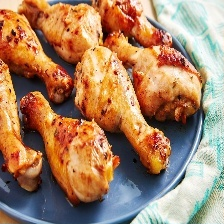

(224, 224, 3)


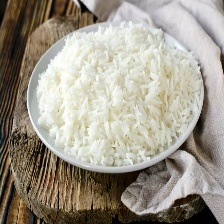

(224, 224, 3)


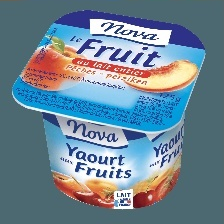

(224, 224, 3)


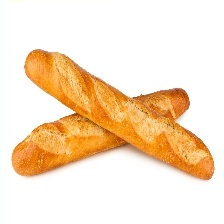

1/1 [==============================] - 0s 253ms/step
[619.35046, 712.62933, 689.3147, 626.0936]
Riz0
1/1 [==============================] - 0s 289ms/step
[609.0907, 763.8417, 714.9798, 711.1475]
Riz0
1/1 [==============================] - 0s 241ms/step
[672.4083, 776.75494, 566.8341, 746.1201]
Yaourt1
1/1 [==============================] - 0s 231ms/step
[769.2923, 757.9957, 754.5234, 795.66254]
Yaourt1


In [ ]:
traitement_image('output.jpg')

In [ ]:
test('Riz1.jpg')

1/1 [==============================] - 0s 218ms/step
[0.0, 812.9272, 724.704, 701.69415]


'Riz1'

In [ ]:
test('frr.jpg')

1/1 [==============================] - 0s 232ms/step
[681.46045, 641.0326, 730.93854, 672.3351]


'riz'

In [ ]:
def fond(path) :
  image = cv2.imread(path)
  n,p,g = image.shape
  for i in range (n) :
    for j in range(p) :
      if image[i,j][1] > 200 :
        image[i,j] = 0
  cv2_imshow(image)

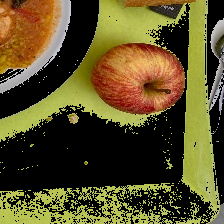

In [ ]:
fond('pomme_test.jpg')

In [ ]:
test('pomme2.jpg')

1/1 [==============================] - 0s 222ms/step
[861.8459, 768.9997, 710.94025, 742.0038, 824.1825, 762.19183]


'riz'

In [ ]:
test('pomme_test.jpg')

1/1 [==============================] - 0s 217ms/step
[852.60455, 735.21857, 676.3347, 706.1792, 797.15063, 731.4883]


'riz'